<a href="https://colab.research.google.com/github/Nlamje45/AI-Projects/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#connecting colab with google drive for importing data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing all necessary libraries for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#reading and storing data with pandas
d=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hotel Bookings.csv", encoding= 'unicode_escape')
d.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# dataset info
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Check for missing values

In [ ]:
#checking for null values
d.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

The agent and company columns are having the maximum null values. They contain unique number which is unique id of the agent and company. So we can replace null values with 0

In [ ]:
#replacing null values with 0
d[['agent','company']] = d[['agent','company']].fillna(0)

In [ ]:
# statistical info
d.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


We can replace the null values in column children with the overall mean value of the column as the number of null values are low and their is low difference between mean and median values

In [ ]:
#replacing null values with mean
d['children'].fillna(round(d.children.mean()), inplace=True)

We need to drop rows which contain null values in country column if we had to make predection but since our moto is Exploraory Data Analysis we can replace the country column with the respective mode country

In [ ]:
#replacing null values with mode
d['country'].fillna(d.country.mode().to_string(), inplace=True)

In [ ]:
#again checking if null values exist
d.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

We need to drop the rows in which Number of adults + children is zero as it does not make any sense

In [ ]:
#removing redundant data
d = d.drop(d[(d.adults+d.babies+d.children)==0].index)

In [ ]:
#checking for null values
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

In [ ]:
#converting to integer type
d[['children', 'company', 'agent']] = d[['children', 'company', 'agent']].astype('int64')

First finding how much booking are canceled

In [ ]:
#checking for canceled bookings
t=d['is_canceled'].value_counts()
t

0    75011
1    44199
Name: is_canceled, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


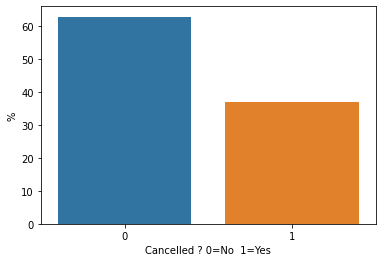

In [ ]:
#visualizing for canceled bookings
t=d['is_canceled'].value_counts()
x=t.index
y=(t/t.sum())*100
ax=sns.barplot(x,y)
ax.set(xlabel='Cancelled ? 0=No  1=Yes', ylabel="%")
plt.show()

Cancellation rate is high as almost 35-37% of the rooms booked where canceled

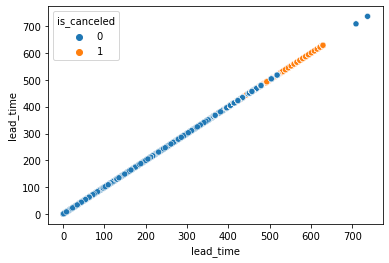

In [ ]:
#scatterplot for lead time and cancellation
sns.scatterplot(x=d['lead_time'],y=d['lead_time'],hue=d['is_canceled'])

When lead time is greater than 500 its leading to cancellation of booking which is obvious 

**Let us analyse the bookings that are not canceled**

We need to drop all the rows in which bookings are cancelled as this would not help much 

In [ ]:
#removing cancelled bookings
nd = d[d['is_canceled'] == 0]

In [ ]:
#printing top5 data
nd.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


Lets Check the market segment from which we are having bookings

In [ ]:
#exploring market segment for Not cancelled booking
t=nd['market_segment'].value_counts()
t

Online TA        35738
Offline TA/TO    15908
Direct           10672
Groups            7714
Corporate         4303
Complementary      646
Aviation           185
Name: market_segment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


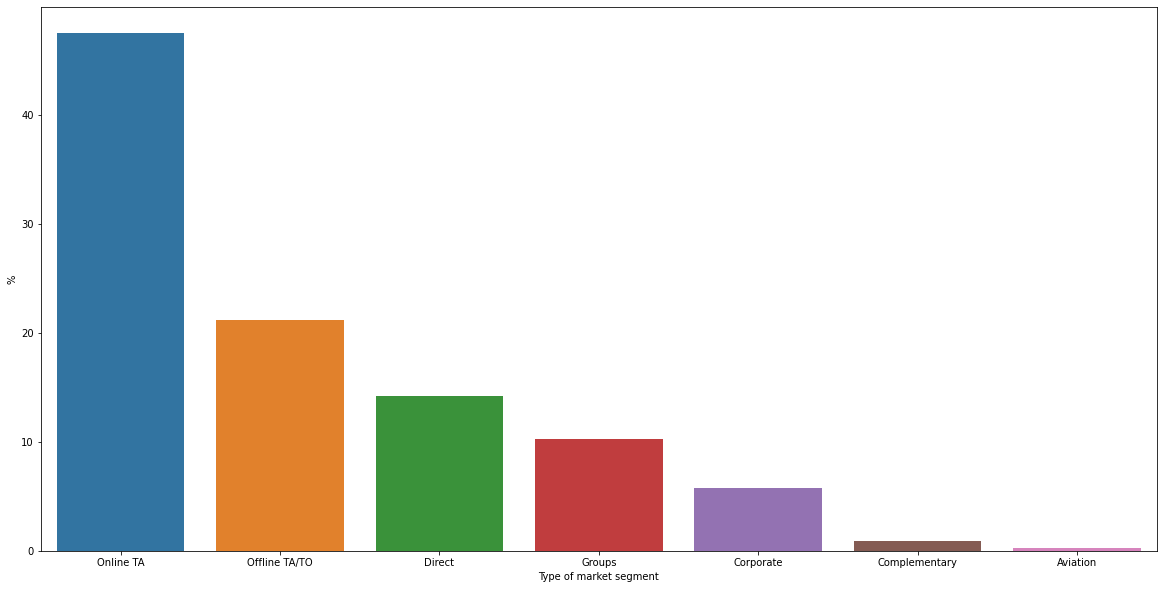

In [ ]:
#visualizing market segment for Not cancelled booking
t=nd['market_segment'].value_counts()
x=t.index
y=(t/t.sum())*100
plt.figure(figsize=(20,10))
ax=sns.barplot(x,y)
ax.set(xlabel='Type of market segment', ylabel="%")
plt.show()

Majority of bookings are from online segment which is more than 45%

Let us now check the type of customer booking

In [ ]:
#exploring type of customer for Not cancelled booking
t=nd['customer_type'].value_counts()
t

Transient          52982
Transient-Party    18703
Contract            2810
Group                516
Name: customer_type, dtype: int64

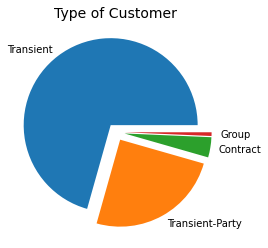

In [ ]:
#visualizing type of customer for not cancelled booking
t=nd['customer_type'].value_counts()
x=t.index
y=(t/t.sum())*100
plt.title("Type of Customer", fontsize=14)
plt.pie(y,labels=x,explode=(0.1,0.1,0.1,0.1))
plt.show()

Transient customers have majority stake in total bookings of about 70%

Now let us check how many customer which earlier booked hotel are revisiting

In [ ]:
#exploring whether customer is repeated for Not cancelled booking
t=nd['is_repeated_guest'].value_counts()
t

0    71806
1     3205
Name: is_repeated_guest, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


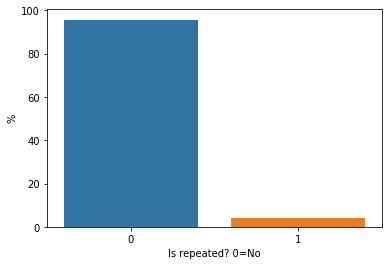

In [ ]:
#visualizing whether customer is repeated for Not cancelled booking
t=nd['is_repeated_guest'].value_counts()
x=t.index
y=(t/t.sum())*100
ax=sns.barplot(x,y)
ax.set(xlabel='Is repeated? 0=No', ylabel="%")
plt.show()

Almost all the people booking are not revisiting which is bad. Only 5-10% are repeating customers

Now let's check type of hotel which is preffered

In [ ]:
#exploring hotel type prefered for Not cancelled booking
t=nd['hotel'].value_counts()
t

City Hotel      46084
Resort Hotel    28927
Name: hotel, dtype: int64

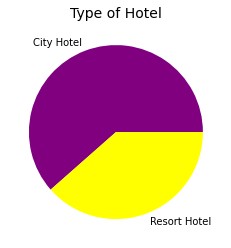

In [ ]:
#visualizing hotel type prefered for Not cancelled booking
t=nd['hotel'].value_counts()
x=t.index
y=(t/t.sum())*100
plt.title("Type of Hotel", fontsize=14)
plt.pie(y,labels=x,colors=['purple','yellow'])
plt.show()

City hotel is mostly preffered by customers around 60% as their are more transient type Customers mostly travelling for business purpose

Let's check number of bookings according to year

In [ ]:
#exploring year for Not cancelled booking
t=nd['arrival_date_year'].value_counts()
t

2016    36299
2017    24886
2015    13826
Name: arrival_date_year, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


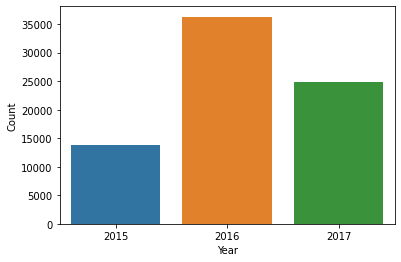

In [ ]:
#visualizing year for Not cancelled booking
t=nd['arrival_date_year'].value_counts()
x=t.index
y=t
ax=sns.barplot(x,y)
ax.set(xlabel='Year', ylabel="Count")
plt.show()

Year 2016 had maximum bookings around 35000

let us analyze lead time of bookings that are not cancelled

Text(0.5, 1.0, 'Distribution for lead time of Non Canceled Bookings')

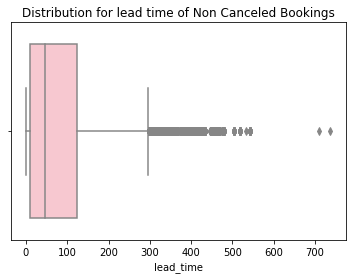

In [ ]:
#box plot for lead time
sns.boxplot(x='lead_time',data=nd,color='pink')
plt.title("Distribution for lead time of Non Canceled Bookings")

The non canceled bookings have lead time less than 150

Lets analyze the country 

In [ ]:
#exploring country
t=nd['country'].value_counts()
print('Country   Count')
print("--"*20)
t

Country   Count
----------------------------------------


PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
       ...  
BDI        1
BHR        1
PYF        1
DMA        1
LCA        1
Name: country, Length: 165, dtype: int64

Mamximum Bookings are from PRT(Portugal)

Let's analyze Booking trend in Month

In [ ]:
#exploring month for Not cancelled booking
t=nd['arrival_date_month'].value_counts()
t

August       8624
July         7907
May          7103
October      6901
March        6620
April        6560
June         6395
September    6385
February     5359
November     4651
December     4391
January      4115
Name: arrival_date_month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


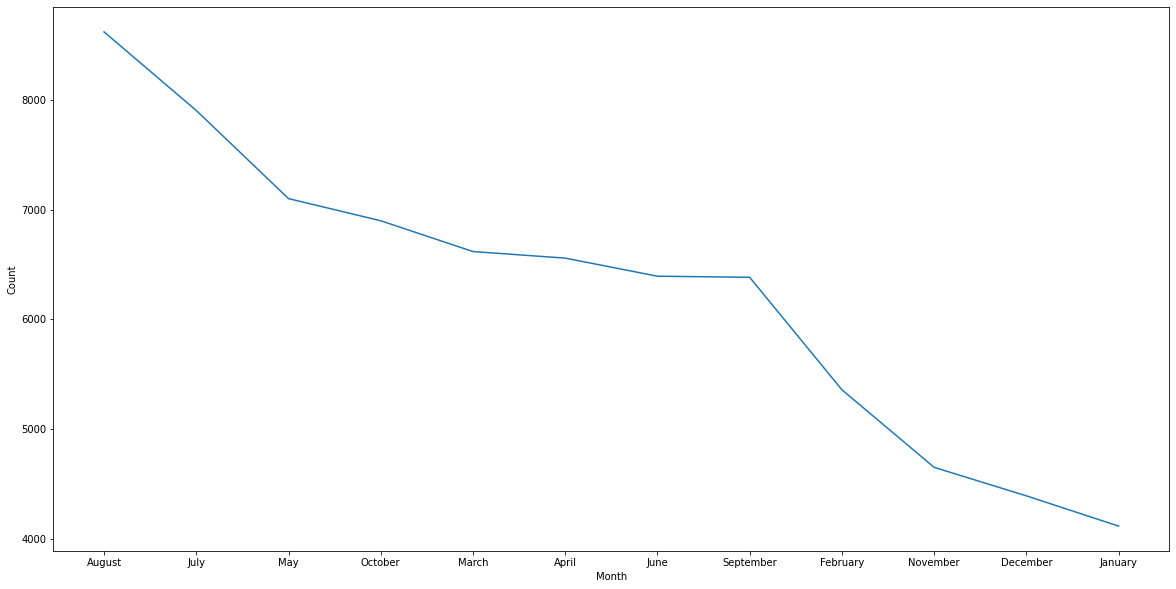

In [ ]:
#visualizing month for Not cancelled booking
t=nd['arrival_date_month'].value_counts()
x=t.index
y=t
plt.figure(figsize=(20,10))
# ploting lineplot
ax=sns.lineplot( x, y)
ax.set(xlabel='Month', ylabel="Count")
plt.show()

August is having the highest Number of bookings which can be due to holidays and January is having Lowest booking

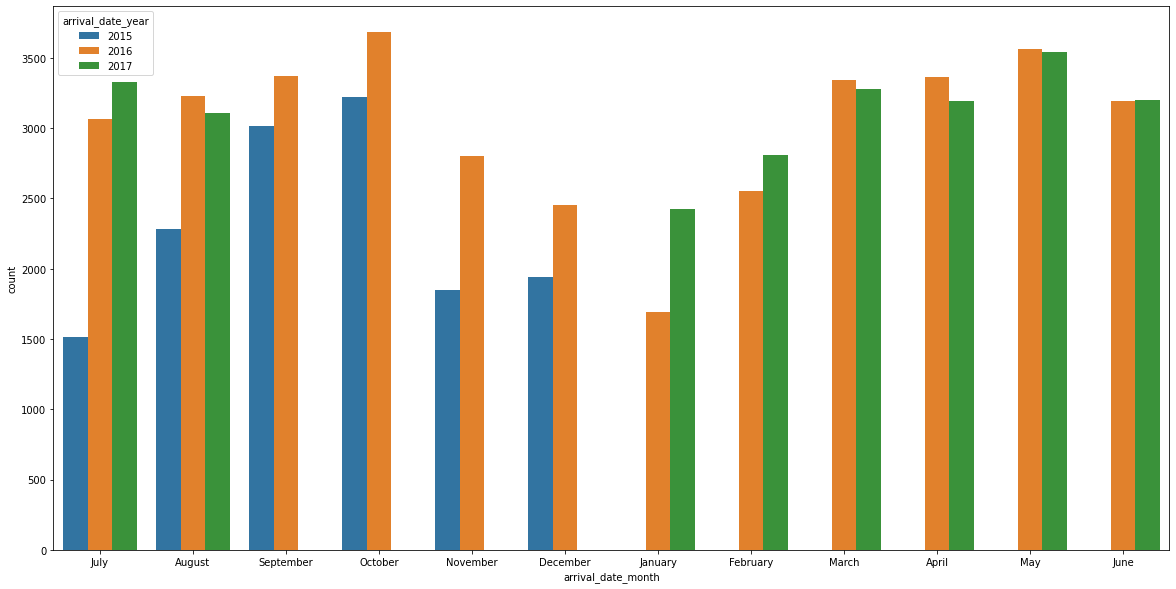

In [ ]:
#vizualizing total bookings with month and year
plt.subplots(figsize=(20,10))
sns.countplot(x='arrival_date_month', hue='arrival_date_year',  data=nd)




*   Month of August has maximum booking in three years. 
*   Month of July is showing Increasing trend year after year



Let's analyze top 10 number of stay of people in the hotel

In [ ]:
#adding new feature total nights
nd['Total_nights']=nd['stays_in_week_nights']+nd['stays_in_weekend_nights']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#exploring Total nights Not cancelled booking
t=nd['Total_nights'].value_counts()
t[:10]

1     15749
3     15725
2     15480
4     11025
7      5686
5      5121
6      2322
10      783
8       720
0       680
Name: Total_nights, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


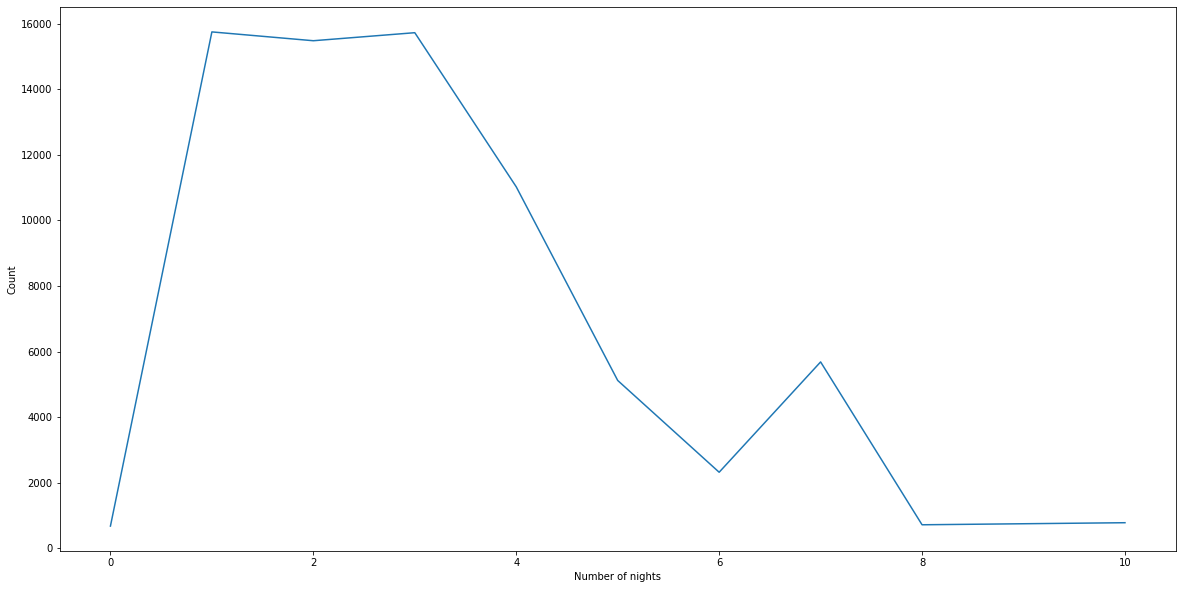

In [ ]:
#evisualizing total nights for Not cancelled booking
t=nd['Total_nights'].value_counts()
t=t[:10]
x=t.index
y=t
plt.figure(figsize=(20,10))
ax=sns.lineplot(x,y)
ax.set(xlabel='Number of nights', ylabel="Count")
plt.show()

It is obvious as we had explored earlier that hotel has majority of transient customer hence bookings are moe for short interval stay of 1,2,3 days

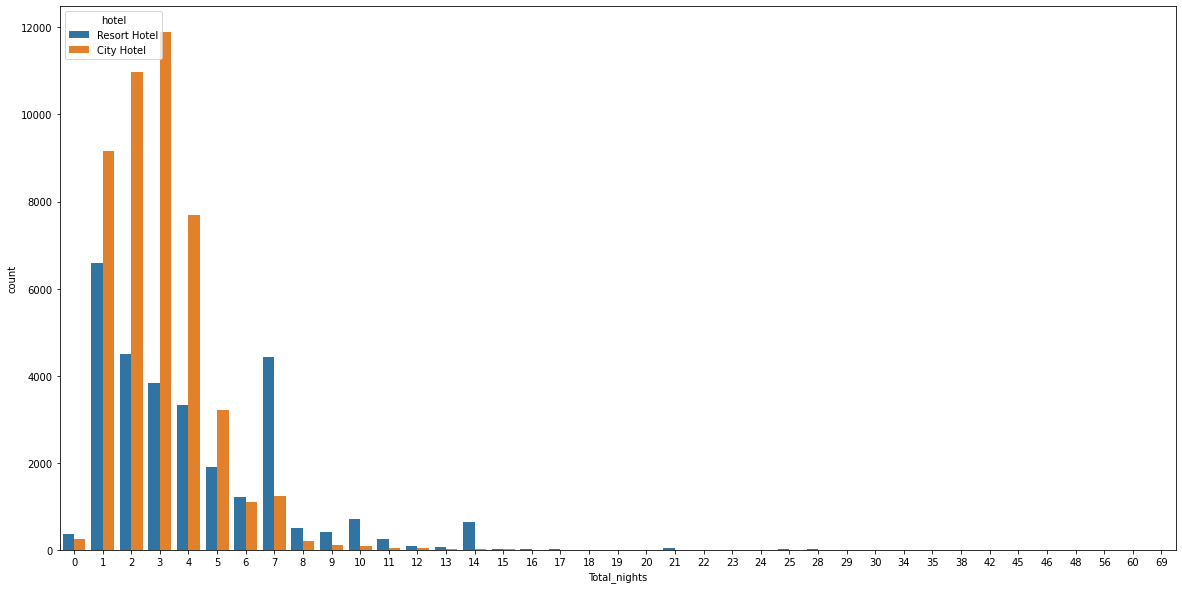

In [ ]:
#visualizing type of hotal and total nights
plt.subplots(figsize=(20,10))
sns.countplot( x="Total_nights", hue="hotel",data=nd)

From graph its clear that long staying gests(more than 6days) prefer Resort hotel over City Hotel

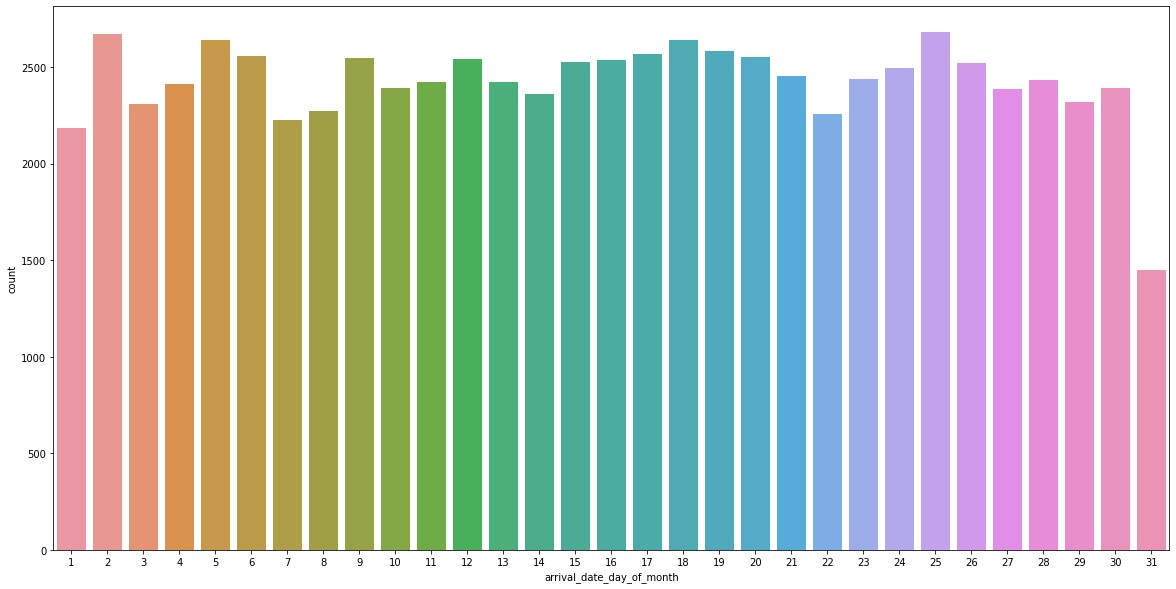

In [ ]:
#visualizing month for Not cancelled booking
plt.subplots(figsize=(20,10))
sns.countplot(x='arrival_date_day_of_month',  data=nd)

Maximum Number of bookings are observed on 2nd and 25th day of the month

Let's analyze meal prefrence and type of hotel

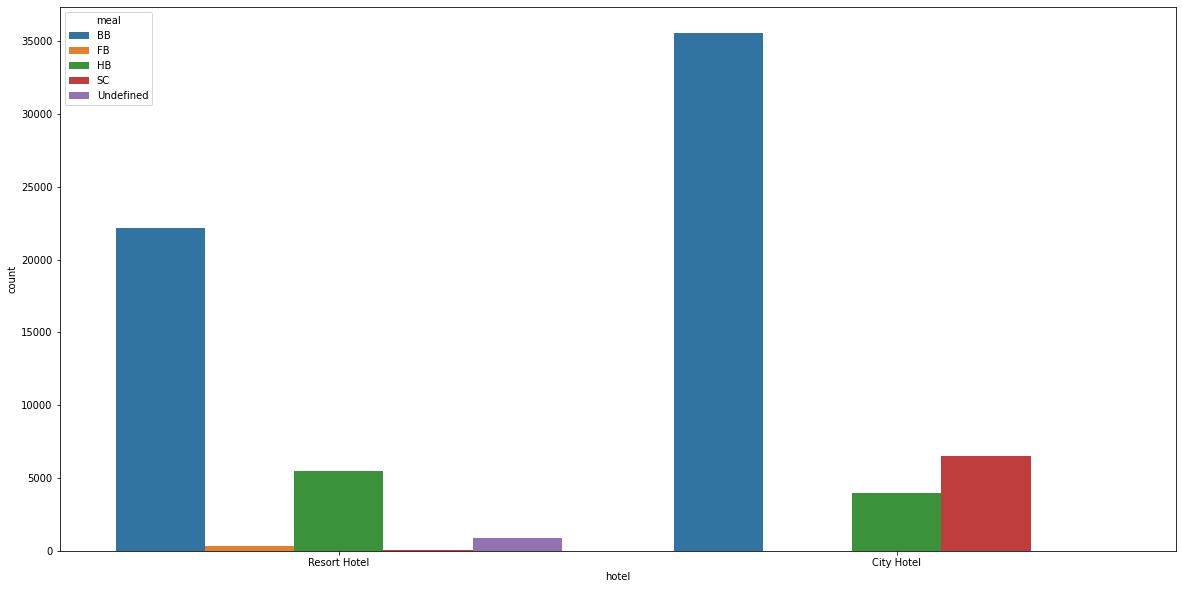

In [ ]:
#visualizing type of meal according to hotal type
plt.subplots(figsize=(20,10))
sns.countplot(x='hotel', hue='meal',  data=nd)



*   More Number of people prefer BB meal in both resort and city hotel so its ingredents must be readily available.
*   People from city hotel prefer SC meal over HB meal



**Let Us now analyze the data of canceled bookings**

In [ ]:
#removing not canceled booking data
cd = d[d['is_canceled'] == 1]

Let us see which type of customers are having maximum cancellation

In [ ]:
#exploring type of customer for cancelled booking
t=cd['customer_type'].value_counts()
t

Transient          36494
Transient-Party     6385
Contract            1262
Group                 58
Name: customer_type, dtype: int64

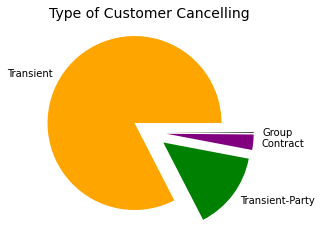

In [ ]:
#visualizing type of customer for cancelled booking
t=cd['customer_type'].value_counts()
x=t.index
y=(t/t.sum())*100
plt.title("Type of Customer Cancelling", fontsize=14)
plt.pie(y,labels=x,colors=["orange","green",'purple','black'],explode=(0.2,0.2,0.2,0.2))
plt.show()

More orders are cancelled by transient Customers it can be due to the increased lead time

In [ ]:
#exploring type of market for cancelled booking
t=cd['market_segment'].value_counts()
t

Online TA        20735
Groups           12094
Offline TA/TO     8302
Direct            1934
Corporate          991
Complementary       89
Aviation            52
Undefined            2
Name: market_segment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


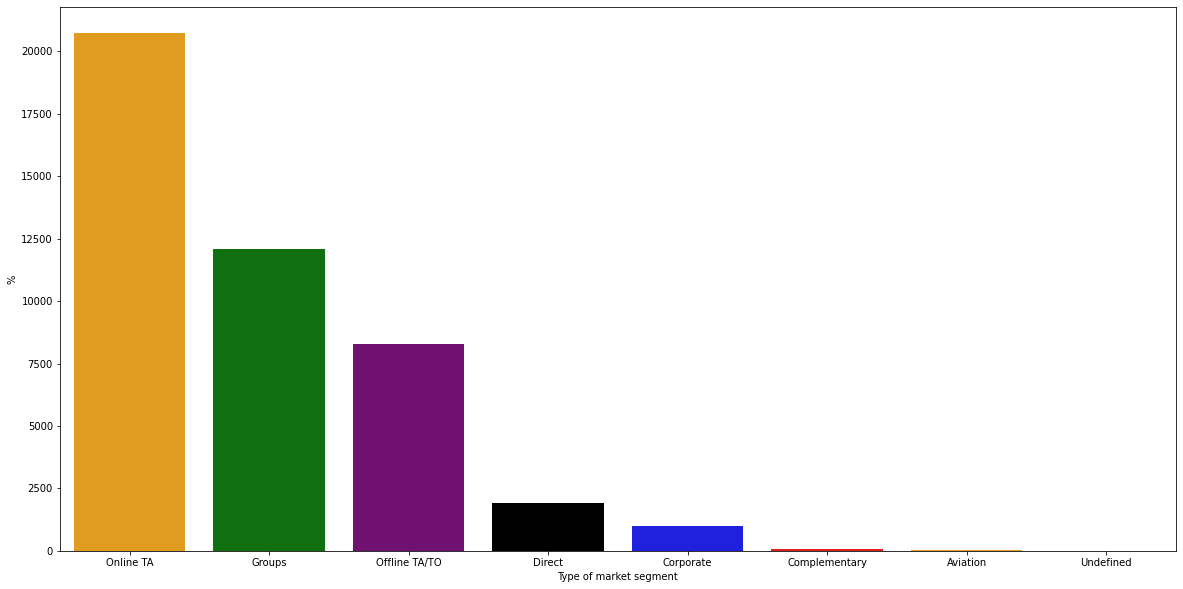

In [ ]:
#visualizing type of customer for cancelled booking
t=cd['market_segment'].value_counts()
x=t.index
y=t
plt.figure(figsize=(20,10))

ax=sns.barplot(x,y,palette=["orange","green",'purple','black','b','r'])
ax.set(xlabel='Type of market segment', ylabel="%")
plt.show()

Online TA is having Maximum Cancellation so there might be issue in website or landing page.

Text(0.5, 1.0, 'Distribution for lead time of Canceled Bookings')

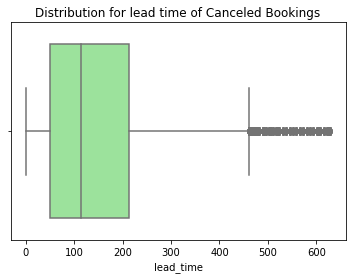

In [ ]:
#Box plot for lead time for cancelled bookings
sns.boxplot(x='lead_time',data=cd,color='lightgreen')
plt.title("Distribution for lead time of Canceled Bookings")

It is clear that lead time greater than 50 leads to cancellation of booking

Let Us check which type of hotel is cancelled Maximum

In [ ]:
#exploring type of hotel for cancelled booking
t=cd['hotel'].value_counts()
t

City Hotel      33079
Resort Hotel    11120
Name: hotel, dtype: int64

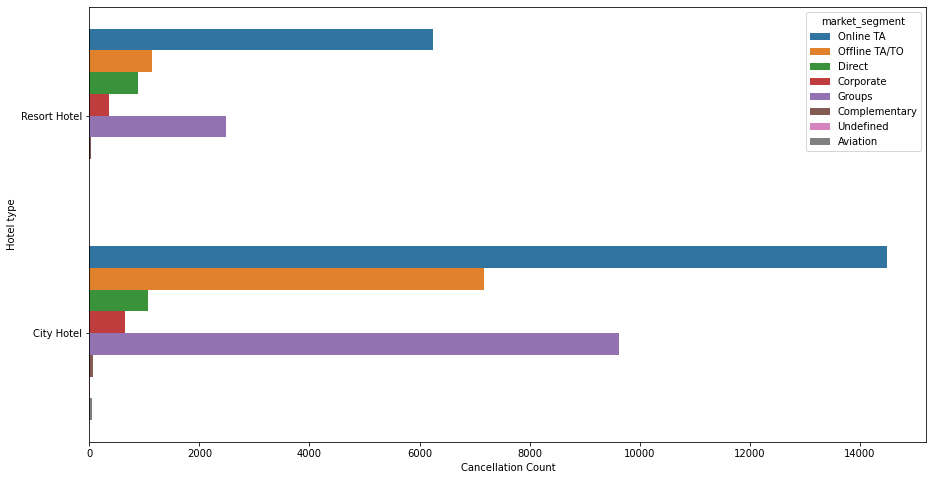

In [ ]:
#visualizing type of customer hotel and market segment for cancelled booking
t=cd['hotel'].value_counts()
x=t
y=t.index
plt.figure(figsize=(15,8))
ax=sns.countplot(y='hotel',hue='market_segment',data=cd)
ax.set(ylabel='Hotel type', xlabel="Cancellation Count")
plt.show()



*   City Hotel has maximum cancellation in online which is obvious as resort hotel also is having maximum cancellation through online which can be due to issue in landing page or website 
*   But city hotel also is having high number of group cancellation which needs to be discussed



In [ ]:
#exploring if repeating customer for cancelled booking
t=cd['is_repeated_guest'].value_counts()
t

0    43672
1      552
Name: is_repeated_guest, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


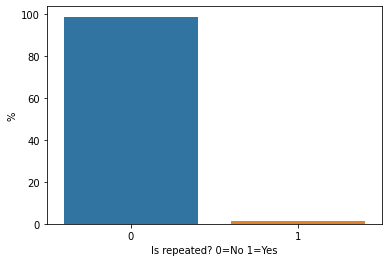

In [ ]:
#visualizing if repeating customer for cancelled booking
t=cd['is_repeated_guest'].value_counts()
x=t.index
y=(t/t.sum())*100
ax=sns.barplot(x,y)
ax.set(xlabel='Is repeated? 0=No 1=Yes', ylabel="%")
plt.show()

Almost maximum people which have cancelled bookings have not visited hotel before which is good but there are certain people which were repeating and have cancelled the order

Answers to the asked questions in problem statement



*   **Have you ever wondered when the best time of year to book a hotel room is?**



**Answer :** According to above visualizations the best time to book hotel from customer prespective to get good deals is in month of december and january when the bookings are less



*   **The optimal length of stay in order to get the best daily rate?**



**Answer :** According to above visualizations the optimal length of the stay to get best deals is 4-5 days

**Conclusion**


* **Cancelled Bookings**


1.   Cancellation rate is high as almost 35-37% of the rooms booked where cancelled
2.   Cancellation has increased due to increased lead time
3. Online TA has maximum number of cancellation about 22000
4. The newly acquired customers are cancelling maximum
5. The landing page or website need to fixed owing online cancellation
6. Transient type of customer are having maximum cancellation
7.Group type of customers are having high cancellation in city hotel




*   **Not Cancelled Bookings**


1.   Cancellation is low when lead time is less than 100
2.   Online TA has maximum number of bookings
3.There are people revisiting and not cancelled the bookings they should be engaged with loyalty program
4.Transient type of customers are doing maximum bookings and city hotel is prefered mostly
5.PRT(Portugal) country is having maximum bookings
6.People prefer city hotel for short stay whereas resort hotel for long stay
7.BB Meal is mostly prefered by customers 





